# EDA for NASA Turbo Fan Jet Engine Dataset
Using NASA's Turbofan Jet Engine dataset to predict RUL (Remaining useful life) for predicive maintainance

Dataset link: [NASA's Prognostics Data Repository](https://www.nasa.gov/intelligent-systems-division/discovery-and-systems-health/pcoe/pcoe-data-set-repository/) 

Listed as Dataset #6

## Import and load in raw data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math

In [3]:
# Global plot appearance settings
mpl.rcParams.update({

    # Figure & Axes
    "figure.figsize": (10, 6),
    "figure.dpi": 120,
    "figure.facecolor": "#0b0f1a",
    "axes.facecolor": "#0b0f1a",
    "axes.edgecolor": "#8aa2c8",
    "axes.linewidth": 0.8,

    # Grid
    "axes.grid": True,
    "grid.color": "#1f2a44",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,
    "grid.alpha": 0.6,

    #  Text
    "text.color": "#e6e6eb",
    "axes.labelcolor": "#e6e6eb",
    "xtick.color": "#c7d0e0",
    "ytick.color": "#c7d0e0",
    "axes.titleweight": "bold",
    "axes.titlesize": 14,
    "axes.labelsize": 12,

    # ===== Ticks =====
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    # Lines
    "lines.linewidth": 2.0,
    "lines.markersize": 5,

    # Legend
    "legend.facecolor": "#0b0f1a",
    "legend.edgecolor": "#8aa2c8",
    "legend.framealpha": 0.9,
    "legend.fontsize": 10,

    # Color Cycle
    "axes.prop_cycle": mpl.cycler(color=[
        "#4cc9f0",
        "#f72585",
        "#b5179e",
        "#7209b7",
        "#560bad",
        "#480ca8",
        "#3a86ff",
        "#ffd166"
    ])
})

In [4]:
# Load in dataset and label columns
col_names = (
    ["unit_number", "time_in_cycles"] + 
    [f"operational_setting_{i}" for i in range(1,4)] +
    [f"sensor_{i}" for i in range(1, 22)]
)

df = pd.read_csv("../data/train_FD001.txt", sep=r"\s+", header=None, names=col_names)

In [5]:
df

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [6]:
# Check for nulls and basic statistics
print(df.info())
print('------' * 12)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_1               20631 non-null  float64
 6   sensor_2               20631 non-null  float64
 7   sensor_3               20631 non-null  float64
 8   sensor_4               20631 non-null  float64
 9   sensor_5               20631 non-null  float64
 10  sensor_6               20631 non-null  float64
 11  sensor_7               20631 non-null  float64
 12  sensor_8               20631 non-null  float64
 13  sensor_9               20631 non-null  float64
 14  sensor_10              20631 non-null  float64
 15  se

## Creating RUL and EDA

### EDA Question 1: How do sensor signals evolve over an engine’s lifecycle, and what degradation patterns appear as the engine approaches failure?

### EDA Question 2: Which sensors exhibit consistent degradation trends or monotonic behavior as engines approach failure?

### EDA Question 3: How does the distribution of sensor values change across lifecycle stages (early, mid, late)?

In [7]:
# Get max cycle for each engine: Per-engine lifecycle
rul_lookup = df.groupby("unit_number")["time_in_cycles"].max().reset_index() # cycle at which engine failed
rul_lookup.columns = ["unit_number", "max_cycle"]
rul_lookup

,unit_number,max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [8]:
# Merge max_cycle for each unit back into the dataframe to calculate RUL
df = df.merge(rul_lookup, on="unit_number")
df['RUL'] = df["max_cycle"] - df["time_in_cycles"]

For each engine in the training set, RUL is defined as the difference between the engine's failure cycle and the current cycle.


We create our target and assume that time_in_cycles increases by the same amount each timestep without gaps and
also note that the last observation is considered the failure point for a cycle. With this we can extract a supervised time-series signal

In [9]:
# Check unique values in each feature and append those with 1 or less to dropping list
unique_numbers_1_todrop = []

for x, y in df.nunique().sort_values().items():
    if y <= 1:
        unique_numbers_1_todrop.append(x)
        
unique_numbers_1_todrop

['sensor_18',
 'sensor_10',
 'operational_setting_3',
 'sensor_1',
 'sensor_19',
 'sensor_16',
 'sensor_5']

In [10]:
# Drop features with only one unique value
df = df.drop(columns=unique_numbers_1_todrop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   sensor_2               20631 non-null  float64
 5   sensor_3               20631 non-null  float64
 6   sensor_4               20631 non-null  float64
 7   sensor_6               20631 non-null  float64
 8   sensor_7               20631 non-null  float64
 9   sensor_8               20631 non-null  float64
 10  sensor_9               20631 non-null  float64
 11  sensor_11              20631 non-null  float64
 12  sensor_12              20631 non-null  float64
 13  sensor_13              20631 non-null  float64
 14  sensor_14              20631 non-null  float64
 15  se

In [11]:
# Sanity check for dropped features
df.nunique().sort_values()

sensor_6                    2
operational_setting_2      13
sensor_17                  13
sensor_8                   53
sensor_13                  56
max_cycle                  66
unit_number               100
sensor_20                 120
operational_setting_1     158
sensor_11                 159
sensor_2                  310
RUL                       362
time_in_cycles            362
sensor_12                 427
sensor_7                  513
sensor_15                1918
sensor_3                 3012
sensor_4                 4051
sensor_21                4745
sensor_14                6078
sensor_9                 6403
dtype: int64

In [12]:
# Square root rule to decide number of bins
num_bins = int(np.sqrt(20631))

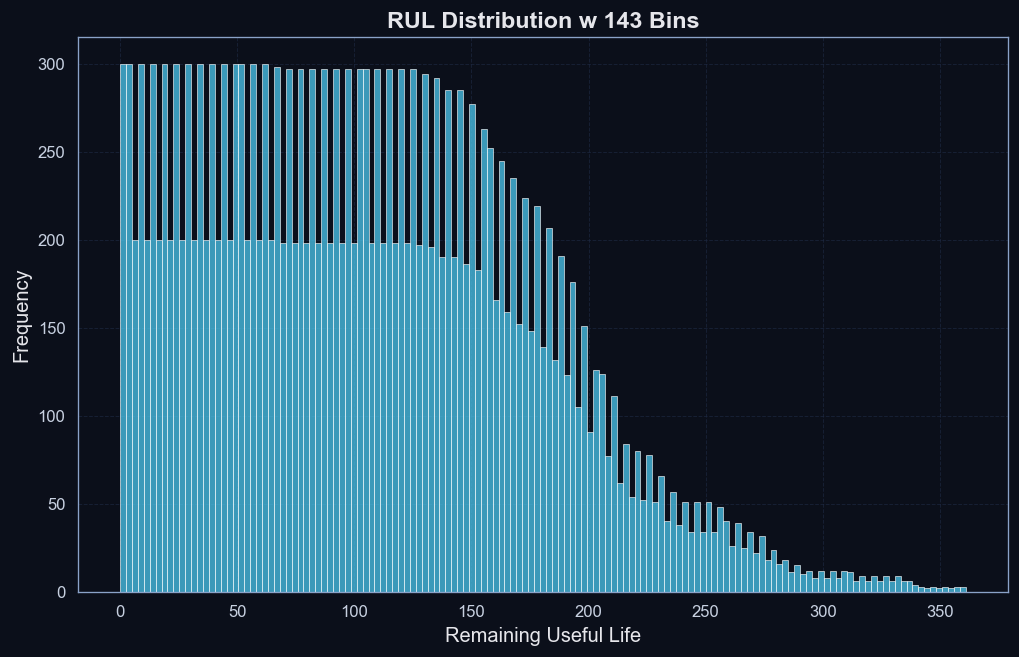

In [13]:
# Plot RUL distribution with square root rule
sns.histplot(data=df[125:], x="RUL", bins=num_bins)
plt.title("RUL Distribution w 143 Bins")
plt.xlabel("Remaining Useful Life")
plt.ylabel("Frequency")
# plt.savefig('../figures_and_plots/eda_rul_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

We can see that remaining useful life is pretty much constant before 125 which will end up dominating the loss: without capping the dataset is dominated by early lifecycle observations
which are less important in terms of degradation signal.

In [14]:
# Cap the RUL
RUL_CAP = 125
df['RUL_capped'] = df["RUL"].clip(upper=RUL_CAP)

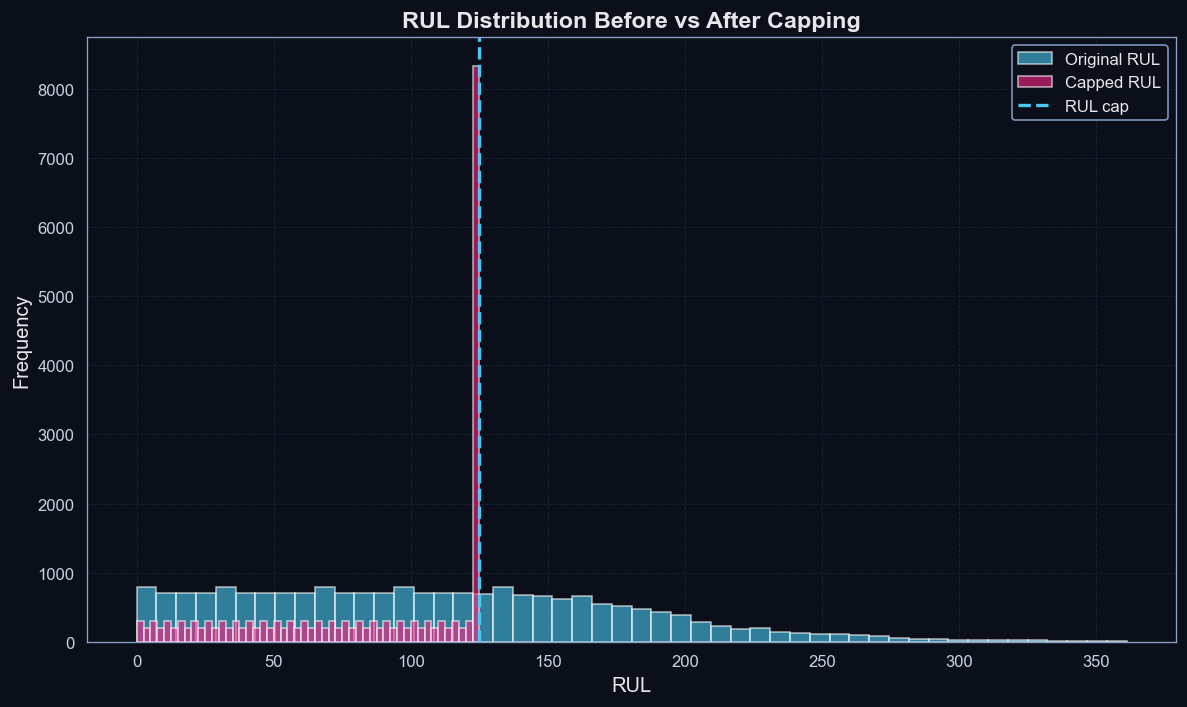

In [15]:
# Verify RUL cap
plt.hist(df["RUL"], bins=50, alpha=0.6, label="Original RUL")
plt.hist(df["RUL_capped"], bins=50, alpha=0.6, label="Capped RUL")
plt.axvline(RUL_CAP, linestyle="--", linewidth=2, label="RUL cap")
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.title("RUL Distribution Before vs After Capping")
plt.legend()
plt.tight_layout()
# plt.savefig('../figures_and_plots/eda_rul_distribution_after_capping.png', dpi=300, bbox_inches='tight')
plt.show()

We cap the RUL to capture the pattern when it matters more - closer to engine failure.

In [16]:
# Compute engine lifetimes
engine_life = (
    df.groupby('unit_number')['time_in_cycles']
    .max()
    .reset_index(name='max_cycle')
)

In [17]:
# Get engines with different length cycles to account for variable types of degradation
q33 = engine_life['max_cycle'].quantile(.33)
q66 = engine_life['max_cycle'].quantile(.66)

In [18]:
def life_group(x):
    """ Function to assign the engines to one of three groups depending on its lifespan"""
    if x <= q33:
        return 'short'
    elif x<=q66:
        return 'medium'
    else:
        return 'long'

In [33]:
# Creating a column that categorizes each engine into a group and select one from each
engine_life['life_group'] = engine_life['max_cycle'].apply(life_group)

selected_units = (
    engine_life.groupby('life_group').head(3)['unit_number']
)

In [20]:
engine_life

,unit_number,max_cycle,life_group
0,1,192,medium
1,2,287,long
2,3,179,short
3,4,189,medium
4,5,269,long
...,...,...,...
95,96,336,long
96,97,202,medium
97,98,156,short
98,99,185,short


In [21]:
# View summary cycle stats for lifecycle groups
print('Short lived engines','----' * 10)
print(engine_life[engine_life['life_group'] == 'short'].describe())
print('Medium lived engines' ,'----' * 10)
print(engine_life[engine_life['life_group'] == 'medium'].describe())
print('Long lived engines', '----' * 10)
print(engine_life[engine_life['life_group'] == 'long'].describe())

Short lived engines ----------------------------------------
       unit_number   max_cycle
count    33.000000   33.000000
mean     50.818182  162.030303
std      29.206650   15.494928
min       3.000000  128.000000
25%      27.000000  154.000000
50%      57.000000  163.000000
75%      74.000000  174.000000
max      99.000000  185.000000
Medium lived engines ----------------------------------------
       unit_number   max_cycle
count     35.00000   35.000000
mean      46.00000  199.800000
std       27.55209    8.054228
min        1.00000  188.000000
25%       24.00000  194.000000
50%       43.00000  199.000000
75%       69.50000  207.000000
max      100.00000  213.000000
Long lived engines ----------------------------------------
       unit_number   max_cycle
count    32.000000   32.000000
mean     55.093750  259.093750
std      30.496282   39.097363
min       2.000000  214.000000
25%      29.500000  230.750000
50%      57.500000  256.500000
75%      82.250000  279.250000
max      96

In [22]:
# Select 3 engines from each group type (short, medium, long)
selected_units

,unit_number,life_group
0,1,medium
1,2,long
2,3,short
3,4,medium
4,5,long
5,6,medium
6,7,long
7,8,short
11,12,short


In [23]:
# Create normalized life fraction column
df['life_fraction'] = (df['time_in_cycles'] /
                       df['max_cycle'])
df

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,max_cycle,RUL,RUL_capped,life_fraction
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,...,2388.02,8138.62,8.4195,392,39.06,23.4190,192,191,125,0.005208
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,...,2388.07,8131.49,8.4318,392,39.00,23.4236,192,190,125,0.010417
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,...,2388.03,8133.23,8.4178,390,38.95,23.3442,192,189,125,0.015625
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,...,2388.08,8133.83,8.3682,392,38.88,23.3739,192,188,125,0.020833
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,...,2388.04,8133.80,8.4294,393,38.90,23.4044,192,187,125,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,21.61,551.43,2388.19,...,2388.26,8137.60,8.4956,397,38.49,22.9735,200,4,4,0.980000
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,21.61,550.86,2388.23,...,2388.22,8136.50,8.5139,395,38.30,23.1594,200,3,3,0.985000
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,21.61,550.94,2388.24,...,2388.24,8141.05,8.5646,398,38.44,22.9333,200,2,2,0.990000
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,21.61,550.68,2388.25,...,2388.23,8139.29,8.5389,395,38.29,23.0640,200,1,1,0.995000


In [24]:
selected_units
# engine_life['unit_number'[selected_units]]

,unit_number,life_group
0,1,medium
1,2,long
2,3,short
3,4,medium
4,5,long
5,6,medium
6,7,long
7,8,short
11,12,short


In [25]:
# assign list of sensors to a variable to generate subplots in next cell
sensor_col = [ 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

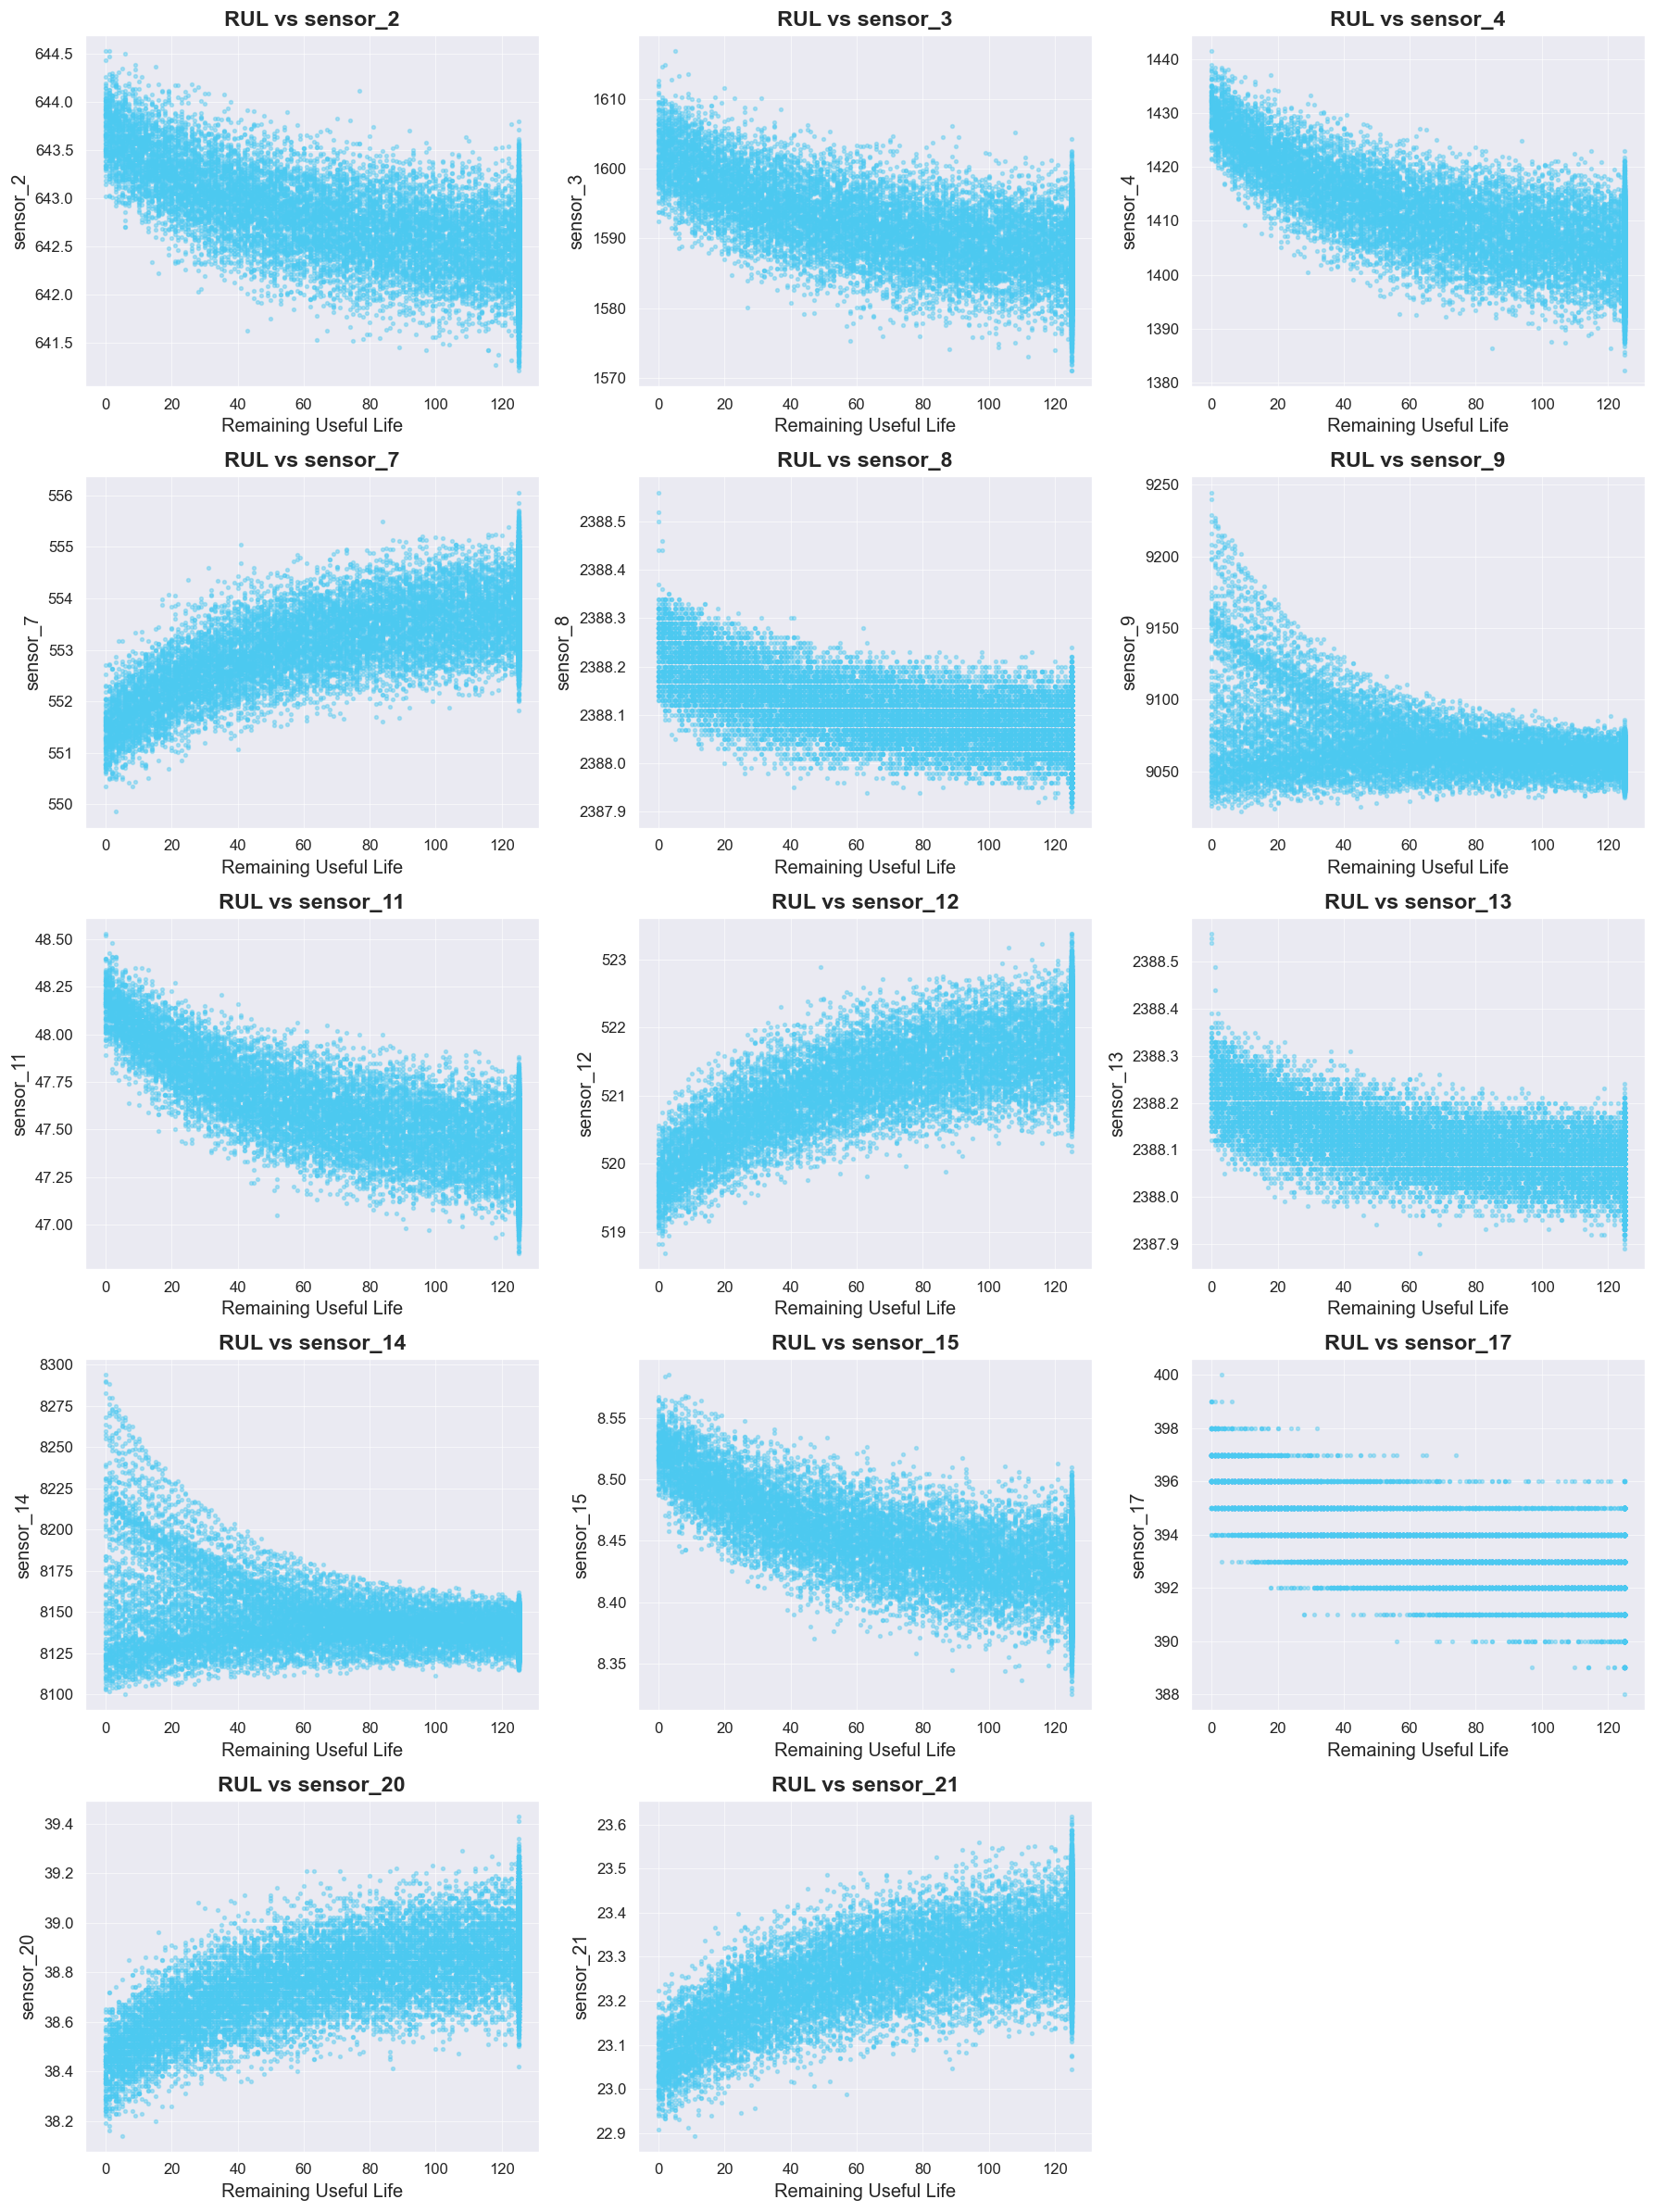

In [26]:
# Create subplots for RUL vs sensors to see which one give the best signal
n_sensors = len(sensor_col)
n_cols = 3
n_rows = math.ceil(n_sensors / n_cols)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(5 * n_cols, 4 * n_rows)
)

axes = axes.flatten()

for i, s in enumerate(sensor_col):
    ax = axes[i]
    ax.scatter(df["RUL_capped"], df[s], s=5, alpha=0.4)
    ax.set_title(f"RUL vs {s}")
    ax.set_xlabel("Remaining Useful Life")
    ax.set_ylabel(s)

# Turn off unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.savefig('RUL vs sensors')
# plt.savefig('../figures_and_plots/eda_q2_rul_vs_sensor_subplot.png', dpi=300, bbox_inches='tight')
plt.show()

### Answering EDA Question 2
Here is RUL plotted against all sensors across the engines to get a rough picture of which sensors give the best signal and are monotonic - meaning they encode degradation
These sensors are prime candidates for modeling/feature engineering:
- sensor 2
- sensor 3
- sensor 4
- sensor 11
- sensor 15

The other sensors also pick up some signal but are unlikely to contributte useful predictive signal:
- sensor 7
- sensor 8
- sensor 12
- sensor 13
- sensor 20
- sensor 21
Some sensors have a variance that increases as RUL decreases:
- sensor 9
- sensor 14
- sensor 17 gives discrete horizontal bands - we may be able to turn this into a bucket or qualitative variable.

In [27]:
strong_sensors = ['sensor_4', 'sensor_11', 'sensor_15']

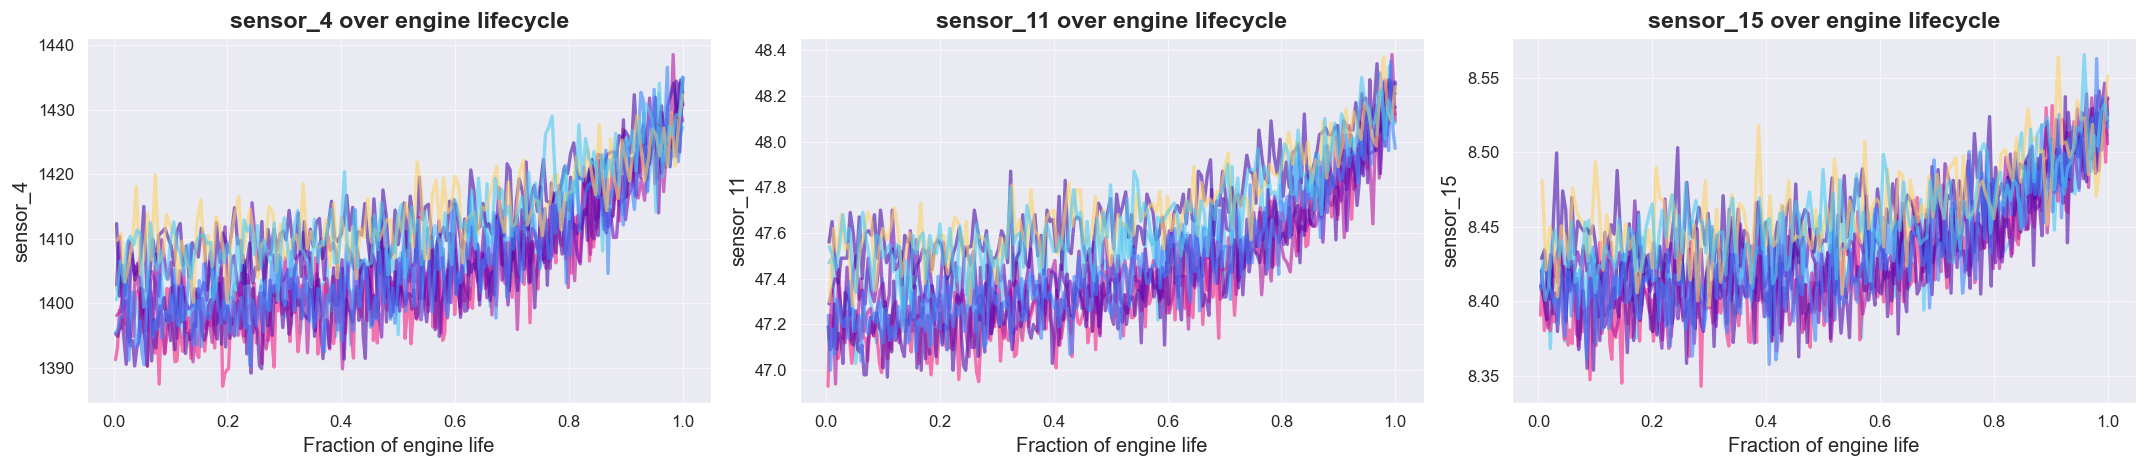

In [40]:
# Create subplots to show per engine degradation trends across different sensors
fig, axes = plt.subplots(
    1, len(strong_sensors),
    figsize=(6 * len(strong_sensors), 4)
)

if len(strong_sensors) == 1:
    axes = [axes]

for ax, s in zip(axes, strong_sensors):
    for u in selected_units:
        eng = df[df['unit_number'] == u].sort_values('life_fraction')
        ax.plot(
            eng['life_fraction'],
            eng[s],
            alpha=0.6
        )

    ax.set_title(f'{s} over engine lifecycle')
    ax.set_xlabel('Fraction of engine life')
    ax.set_ylabel(s)
    ax.grid(True)

plt.tight_layout()
# plt.savefig('../figures_and_plots/eda_q1_sensors_over_engine_lives.png', dpi=300, bbox_inches='tight')
plt.show()

### Answering EDA Question 1
By plotting sensor values over the fraction of engine life and overlaying a stratified sample of engines with short, medium, and long lifespans, we can see that the selected engines follow very similar trends, variance, and overall patterns across the three strong degradation sensors. While individual engines show some noise, the underlying signal behavior is consistent across units.

Across all sensors, the signal remains relatively flat early in the engine’s life, but the slope increases as the fraction of engine life grows, indicating non-linear behavior and increasingly strong trends. Overall, the degradation pattern appears monotonic and gradual rather than abrupt, with sensor values drifting and accelerating as the engine approaches failure.

In [46]:
# Merge in life_group to dataframe using left join
df = df.merge(
    engine_life[['unit_number', 'life_group']],
    on='unit_number',
    how='left'
)

In [50]:
# Check that dataframes merged properly
df['life_group'].isna().sum()

0

In [51]:
df['life_group'].value_counts()

life_group
long      8291
medium    6993
short     5347
Name: count, dtype: int64

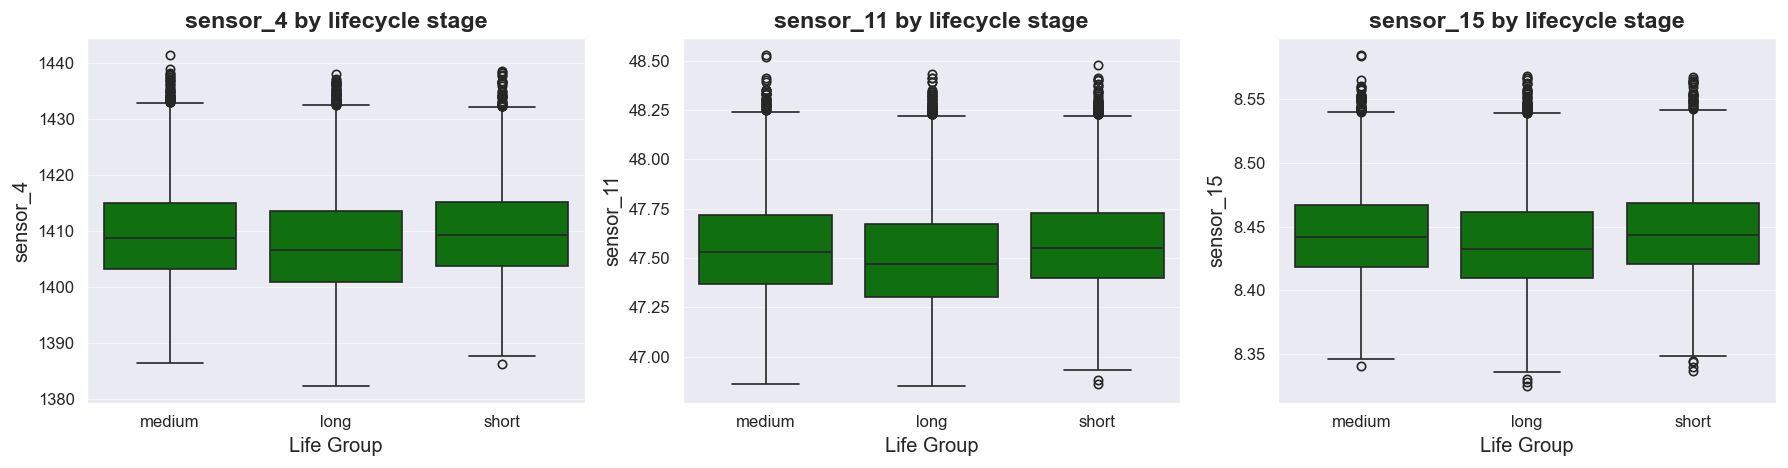

In [68]:
# Create subplot for plotting distribution
fig, axes = plt.subplots(
    1, len(strong_sensors),
    figsize=(5 * len(strong_sensors), 4),
    sharey=False
)

if len(strong_sensors) == 1:
    axes = [axes]

for ax, s in zip(axes, strong_sensors):
    sns.boxplot(data=df,
                x='life_group',
                y=s,
                ax=ax,
                color='green'
    )
    ax.set_title(f'{s} by lifecycle stage')
    ax.set_xlabel('Life Group')
    ax.set_ylabel(s)

plt.tight_layout()
# plt.savefig('../figures_and_plots/eda_q3_sensor_distribution_by_life_group.png', dpi=300, bbox_inches='tight')
plt.show()

### Answering EDA question 3
Across all sensors and life groups the median stays similar, same with the IQRs - this shows us that the sensors all show a similar degradation signal across all life groups for the given engines.

*Degradation patterns stay consistent*: this suggests that degradation patterns captured by these sensors are not strongly dependent on an engine’s eventual lifespan. Instead, sensor behavior follows similar dynamics across engines, supporting the use of a global modeling approach rather than stratifying models by lifespan group.

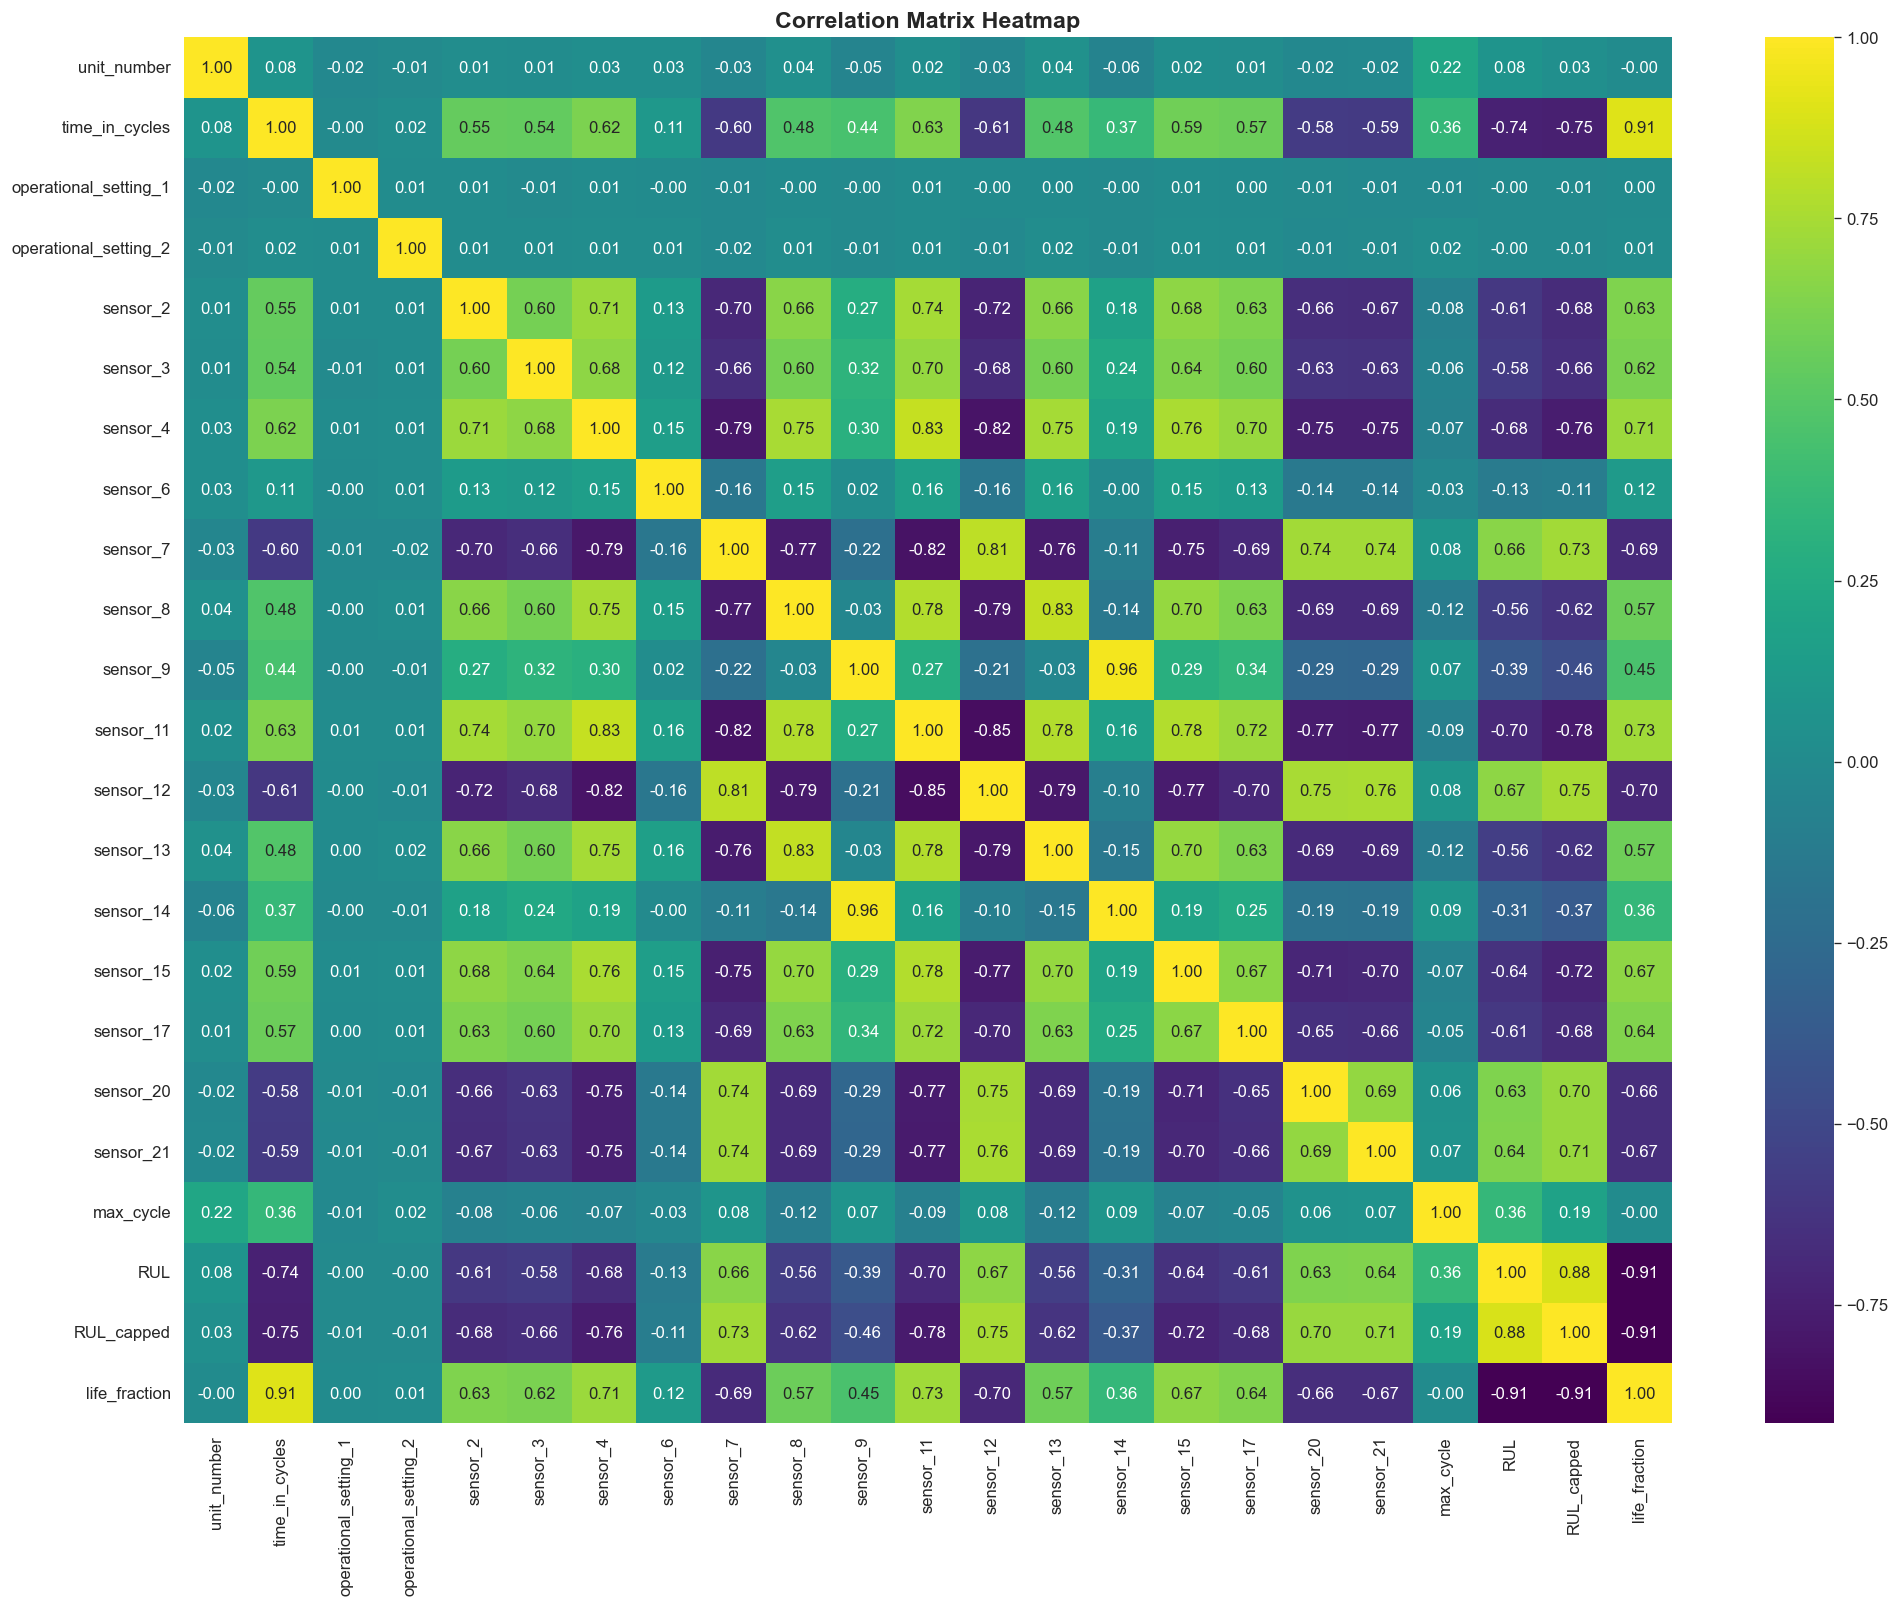

In [29]:
# Create correlation matrix heatmap
corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title('Correlation Matrix Heatmap')
plt.show()

We must note sensor 14/sensor 9's high correlation of 0.96



We should consider dropping these or running PCA to reduce dimensionality